In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
#!wget $data -O data-week-3.csv 

In [4]:

df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [6]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [7]:

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [8]:
df.totalcharges = df.totalcharges.fillna(0)

In [9]:
df.churn = (df.churn == 'yes').astype(int)

In [10]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


## Setting upd the validation framework

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [13]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, train_size = 0.8)

In [14]:
len(df_full_train),len(df_test)

(5634, 1409)

In [15]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

In [19]:
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.733582
1    0.266418
Name: proportion, dtype: float64

In [21]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [22]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [23]:
numerical = ['tenure', 'monthlycharges','totalcharges']

In [24]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [25]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [26]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.6 - Feature Importance: Churn Rate And Risk Ratio

In [27]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,6338-avwcy,male,0,no,no,3,no,no_phone_service,dsl,no,...,yes,no,yes,no,month-to-month,yes,mailed_check,40.15,130.75,1
1,3354-oadjp,female,0,no,no,8,yes,no,dsl,yes,...,no,yes,no,no,one_year,no,bank_transfer_(automatic),54.25,447.75,0
2,1899-vxwxm,male,0,no,no,48,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),106.10,5082.80,1
3,0999-qxnsa,male,1,no,yes,7,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,45.75,344.20,0
4,9359-ugbtk,female,0,no,no,67,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,yes,bank_transfer_(automatic),72.35,4991.50,0


In [28]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.2723054960742327)

In [29]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2605932203389831)

In [30]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26641817536386225)

In [31]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.2)

In [32]:
global_churn - churn_partner

np.float64(0.06641817536386224)

In [33]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3290789927561228)

In [34]:
global_churn - churn_no_partner

np.float64(-0.06266081739226054)

# risk ratio

In [35]:
churn_no_partner / global_churn

np.float64(1.2351972319706834)

In [36]:

df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.272305,2802,0.005887,1.022098
male,0.260593,2832,-0.005825,0.978136


ModuleNotFoundError: No module named 'Ipython'

In [38]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

,mean,count,diff,risk
gender,,,,
female,0.272305,2802,0.005887,1.022098
male,0.260593,2832,-0.005825,0.978136


,mean,count,diff,risk
seniorcitizen,,,,
0,0.237288,4720,-0.029130,0.890660
1,0.416849,914,0.150431,1.564642


,mean,count,diff,risk
partner,,,,
no,0.329079,2899,0.062661,1.235197
yes,0.200000,2735,-0.066418,0.750700


,mean,count,diff,risk
dependents,,,,
no,0.313930,3934,0.047512,1.178335
yes,0.156471,1700,-0.109948,0.587312


,mean,count,diff,risk
phoneservice,,,,
no,0.24635,548,-0.020068,0.924676
yes,0.26858,5086,0.002162,1.008116


,mean,count,diff,risk
multiplelines,,,,
no,0.254931,2738,-0.011488,0.956881
no_phone_service,0.246350,548,-0.020068,0.924676
yes,0.284497,2348,0.018079,1.067860


,mean,count,diff,risk
internetservice,,,,
dsl,0.188272,1944,-0.078147,0.706677
fiber_optic,0.421478,2477,0.155059,1.582015
no,0.075021,1213,-0.191398,0.281590


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416874,2809,0.150456,1.564737
no_internet_service,0.075021,1213,-0.191398,0.281590
yes,0.148263,1612,-0.118155,0.556505


,mean,count,diff,risk
onlinebackup,,,,
no,0.399595,2470,0.133177,1.499879
no_internet_service,0.075021,1213,-0.191398,0.281590
yes,0.216812,1951,-0.049606,0.813803


,mean,count,diff,risk
deviceprotection,,,,
no,0.396812,2447,0.130394,1.489435
no_internet_service,0.075021,1213,-0.191398,0.281590
yes,0.222391,1974,-0.044027,0.834744


,mean,count,diff,risk
techsupport,,,,
no,0.417233,2797,0.150815,1.566082
no_internet_service,0.075021,1213,-0.191398,0.281590
yes,0.149631,1624,-0.116788,0.561638


,mean,count,diff,risk
streamingtv,,,,
no,0.339531,2259,0.073113,1.274428
no_internet_service,0.075021,1213,-0.191398,0.281590
yes,0.297410,2162,0.030992,1.116327


,mean,count,diff,risk
streamingmovies,,,,
no,0.336319,2233,0.069901,1.262372
no_internet_service,0.075021,1213,-0.191398,0.281590
yes,0.301188,2188,0.034770,1.130510


,mean,count,diff,risk
contract,,,,
month-to-month,0.430671,3130,0.164253,1.616522
one_year,0.104991,1162,-0.161427,0.394085
two_year,0.023100,1342,-0.243318,0.086705


,mean,count,diff,risk
paperlessbilling,,,,
no,0.166957,2294,-0.099461,0.626674
yes,0.334731,3340,0.068312,1.256410


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.172245,1225,-0.094173,0.646521
credit_card_(automatic),0.152301,1195,-0.114117,0.571662
electronic_check,0.449766,1921,0.183348,1.688195
mailed_check,0.188708,1293,-0.077710,0.708317


## 3.6 - Feature Importance: Mutual Information

In [39]:

from sklearn.metrics import mutual_info_score

In [40]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.10448766102525275

In [41]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [42]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.104488
onlinesecurity      0.063553
techsupport         0.063359
internetservice     0.056098
onlinebackup        0.046262
deviceprotection    0.044894
paymentmethod       0.043497
streamingtv         0.031831
streamingmovies     0.031587
paperlessbilling    0.018102
dependents          0.014314
partner             0.010763
seniorcitizen       0.010426
multiplelines       0.000611
phoneservice        0.000113
gender              0.000088
dtype: float64

## 3.7 - Feature Importance: Correlation

In [43]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.356385
monthlycharges    0.193451
totalcharges     -0.206332
dtype: float64

In [44]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.1724048666839244)

## 3.8 One-hot encoding

In [70]:
from sklearn.feature_extraction import DictVectorizer

In [71]:
dicts = df_train[['gender','contract']].iloc[:100].to_dict(orient='records')

In [82]:
dv = DictVectorizer(sparse=False)

In [84]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [85]:
dv.get_feature_names()

AttributeError: 'DictVectorizer' object has no attribute 'get_feature_names'

In [78]:
dv.transform(dicts)

array([[0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0.

In [86]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [87]:
test_3 = df_train[['gender','contract']].iloc[:100]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')
test_3 = enc.fit_transform(test_3)

In [88]:
test_3_display = pd.DataFrame(test_3.toarray())
test_3_display

,0,1,2,3,4
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,1.0
96,1.0,0.0,1.0,0.0,0.0
97,1.0,0.0,0.0,1.0,0.0
98,0.0,1.0,1.0,0.0,0.0


## 3.9 Logistic Regression

In [89]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [90]:
# linspace() gives 51 evenly spaced out numbers from the range (-7, 7).
z = np.linspace(-7, 7, 51)

In [91]:
# Very extreme values usually lie towards 0 or 1, depending on the positivity/negativity of the number
# You can tell from -10 onwards whereby the value, when rounded to 5 decimal places, leads to 0.
# Same goes for 10 onwards, whereby the value leads to 1.

values = [-1000, -100, -50, -10, -7.5, -5, -3, -1, 0, 1, 3, 5, 7.5, 10, 50, 100, 1000]

for value in values:
    print(round(sigmoid(value),5))

0.0
0.0
0.0
5e-05
0.00055
0.00669
0.04743
0.26894
0.5
0.73106
0.95257
0.99331
0.99945
0.99995
1.0
1.0
1.0


/tmp/ipykernel_2051/3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


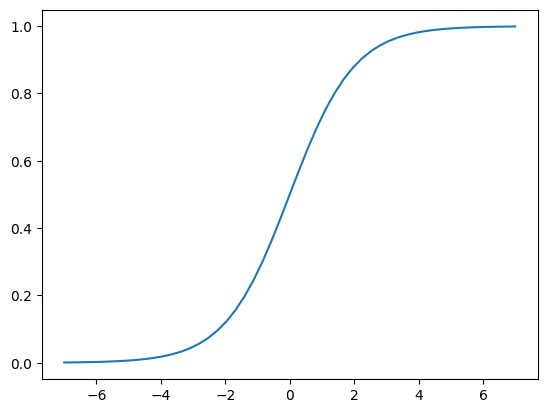

In [92]:
plt.plot(z, sigmoid(z))

In [93]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [94]:
# Logistic Regressions works just like linear regression WITH the sigmoid function applied to the scores.
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 - Training Logistic Regression with Scikit-Learn

In [95]:
from sklearn.linear_model import LogisticRegression

In [97]:
model = LogisticRegression(solver='lbfgs')

# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [98]:
model.intercept_[0]

np.float64(-0.139933326072674)

In [99]:
# Weights
model.coef_[0].round(3)

array([ 0.636, -0.268, -0.506,  0.025, -0.163,  0.052, -0.118, -0.072,
       -0.047, -0.091, -0.315,  0.296, -0.118,  0.003, -0.219,  0.114,
       -0.032,  0.115, -0.118, -0.135,  0.193, -0.118, -0.213, -0.195,
        0.057, -0.131, -0.007,  0.014, -0.16 ,  0.21 , -0.202,  0.114,
       -0.252,  0.16 , -0.175, -0.118,  0.155, -0.084, -0.118,  0.064,
        0.198, -0.118, -0.218, -0.058,  0.   ])

## 3.11 - Model Interpretation